In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from ctapipe.instrument import CameraGeometry
from ctapipe.visualization import CameraDisplay
from ctapipe.io import EventSource

muon_rings_keys = [78124, 78437, 79331, 80266, 81137, 82039, 82691, 84192, 84560, 84631, 86287, 86345, 86590, 86633, 87027, 87511, 87597, 88049, 88103, 88130, 88524, 88598, 88599, 88647, 89104, 89236, 90093, 90324, 90493, 90635, 91012, 91662, 93161, 94747, 96593, 97606, 98657, 99694]

filename = f'/Users/vdk/LST/LST_work/corsika_4LSTprotons/simtel_corsika_run3990.simtel.gz'
source = EventSource(filename)

In [3]:
event_container = pickle.load(open('/Users/vdk/LST/4LST_R1Cut2_minPix50.pkl', 'rb'))


In [4]:
muon_events = {}
proton_events = {}
for key in event_container:
    if key in muon_rings_keys:
        muon_events[key] = event_container[key]
    else:
        proton_events[key] = event_container[key]

### Constants

In [5]:
active_threshold = 2

## Muon analysis

In [6]:
# List with telescope values for muon events
# muon_events didnt fitted 
empty_muons= [79331, 81137, 84560, 86590, 90093, 93161]
pop_tels = [1, 3, 1, 3, 4, 3]
#muon_telescope = [2,3,1,1,3]
muon_telescope = []

#keys = [key for key in muon_events if key > 81137]
for key in muon_events:
    if key in empty_muons:
        muon_telescope.append(pop_tels.pop(0))
    else:
        for tels in muon_events[key].trigger.tels_with_trigger:
            if not np.isnan(muon_events[key].muon.tel[tels].efficiency.optical_efficiency):
                muon_telescope.append(tels)
                break

print(len(muon_telescope))
print(len(muon_events))


38
38


In [7]:
for item,key in enumerate(muon_events):
    print(item)
    print(muon_events[key].r1.tel[muon_telescope[item]].waveform.shape)
    

0
(1855, 40)
1
(1855, 40)
2
(1855, 40)
3
(1855, 40)
4
(1855, 40)
5
(1855, 40)
6
(1855, 40)
7
(1855, 40)
8
(1855, 40)
9
(1855, 40)
10
(1855, 40)
11
(1855, 40)
12
(1855, 40)
13
(1855, 40)
14
(1855, 40)
15
(1855, 40)
16
(1855, 40)
17
(1855, 40)
18
(1855, 40)
19
(1855, 40)
20
(1855, 40)
21
(1855, 40)
22
(1855, 40)
23
(1855, 40)
24
(1855, 40)
25
(1855, 40)
26
(1855, 40)
27
(1855, 40)
28
(1855, 40)
29
(1855, 40)
30
(1855, 40)
31
(1855, 40)
32
(1855, 40)
33
(1855, 40)
34
(1855, 40)
35
(1855, 40)
36
(1855, 40)
37
(1855, 40)


In [8]:
argmaxes = []
variances = []
max_values = []
max_times_argmax = []

variances_m_dict = {}

for item,key in enumerate(muon_events):
    temp_var = []
    for pixel in muon_events[key].r1.tel[muon_telescope[item]].waveform[:, 10:14]:
        #print(np.argmax(pixel))
        argmaxes.append(np.argmax(pixel))
        variances.append(np.var(pixel))
        temp_var.append(np.var(pixel))
        max_values.append(np.max(pixel))
        max_times_argmax.append(np.argmax(pixel) * np.max(pixel))
    variances_m_dict[key] = temp_var
    




In [9]:
len(variances_m_dict[78124])

1855

(0.0, 0.1)

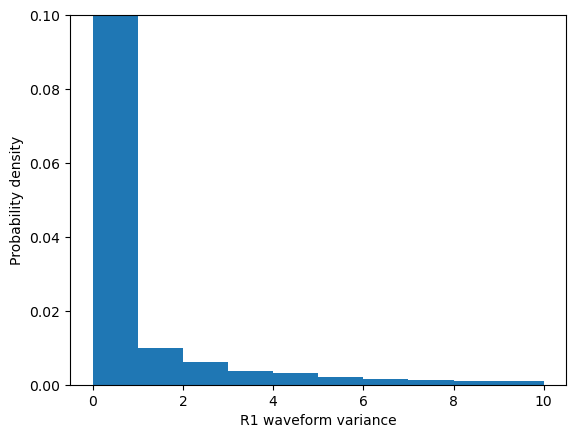

In [10]:
plt.hist(variances, range = (0,10), density = True)
plt.xlabel("R1 waveform variance")
plt.ylabel("Probability density")
plt.ylim(0,0.1)

In [11]:
variances_active = []
argmaxes_active = []
active_muons = 0
for item,key in enumerate(muon_events):
    pixel_mask = np.array(muon_events[key].simulation.tel[muon_telescope[item]].true_image > active_threshold, dtype = bool)
    for pixel in muon_events[key].r1.tel[muon_telescope[item]].waveform[pixel_mask, :]:
        variances_active.append(np.var(pixel))
        argmaxes_active.append(np.argmax(pixel))
    active_muons += 1




(0.0, 1.0)

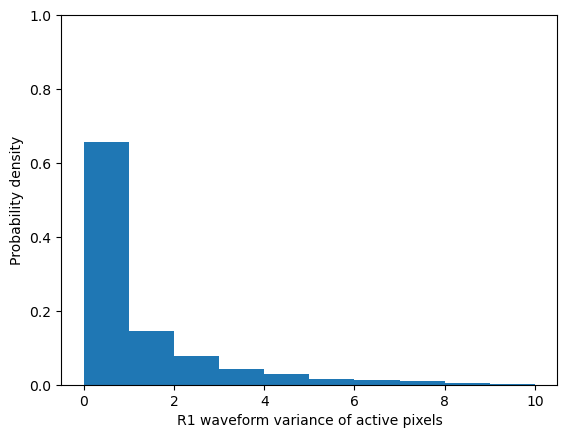

In [12]:
plt.hist(variances_active, range = (0,10), density = True)
plt.xlabel("R1 waveform variance of active pixels")
plt.ylabel("Probability density")
plt.ylim(0,1)

Text(0, 0.5, 'Probability density')

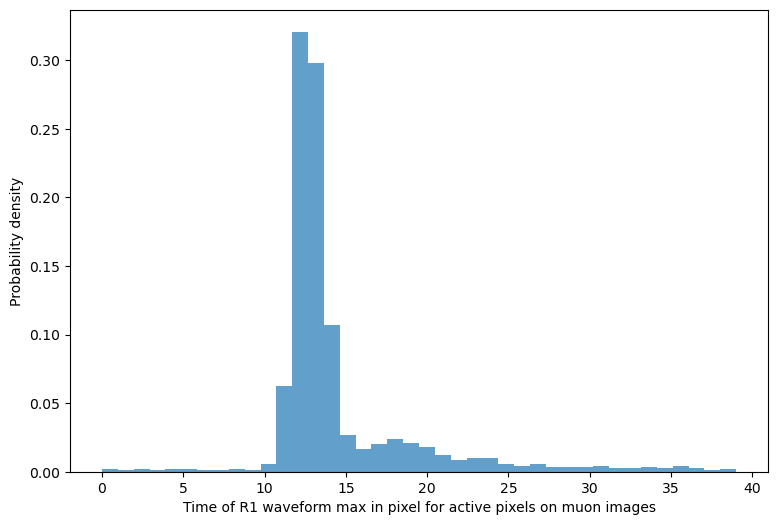

In [13]:
plt.figure(figsize = (9,6))
plt.hist(argmaxes_active, density = True, bins = 40, alpha = 0.7)
plt.xlabel("Time of R1 waveform max in pixel for active pixels on muon images")
plt.ylabel("Probability density")
#plt.ylim(0,1)
        

In [14]:
for item,key in enumerate(muon_events):
    print("------")
    print("New Event", key)
    print("------")
    for tels in muon_events[key].trigger.tels_with_trigger:
        print("tel ", tels)
        print("opt eff ", muon_events[key].muon.tel[tels].efficiency.optical_efficiency)

------
New Event 78124
------
tel  1
opt eff  nan
tel  2
opt eff  0.1639437486011579
tel  3
opt eff  nan
tel  4
opt eff  nan
------
New Event 78437
------
tel  2
opt eff  nan
tel  3
opt eff  0.20319399261517668
------
New Event 79331
------
tel  1
opt eff  nan
tel  4
opt eff  nan
------
New Event 80266
------
tel  1
opt eff  0.2372801239518858
tel  2
opt eff  nan
tel  4
opt eff  nan
------
New Event 81137
------
tel  1
opt eff  nan
tel  3
opt eff  nan
tel  4
opt eff  nan
------
New Event 82039
------
tel  1
opt eff  nan
tel  4
opt eff  0.2207924723892547
------
New Event 82691
------
tel  1
opt eff  0.34810703431513734
tel  2
opt eff  0.48619484180006256
tel  3
opt eff  0.23102181417030687
tel  4
opt eff  nan
------
New Event 84192
------
tel  3
opt eff  nan
tel  4
opt eff  0.2424099135851474
------
New Event 84560
------
tel  1
opt eff  nan
tel  2
opt eff  nan
tel  3
opt eff  nan
tel  4
opt eff  nan
------
New Event 84631
------
tel  2
opt eff  0.22799276701152316
tel  3
opt eff  nan


<Figure size 640x480 with 0 Axes>

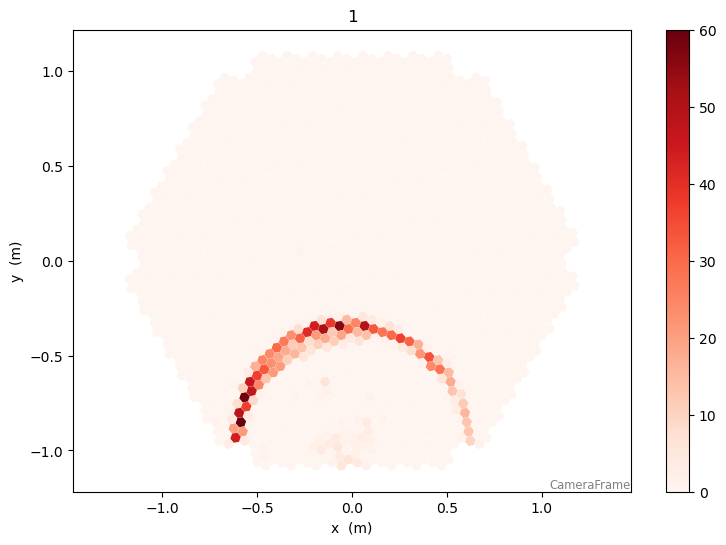

In [15]:
plt.figure()
tels = 1
plt.figure(figsize = (9,6))
camgeom = source.subarray.tel[tels].camera.geometry
title = f'1'
disp = CameraDisplay(camgeom,title=title)
disp.image = muon_events[79331].simulation.tel[tels].true_image
#disp.image = event_container[i].r1.tel[m].waveform.sum(axis=1)
disp.cmap = plt.cm.Reds
disp.add_colorbar()
#disp.set_limits_percent(95)
plt.show()

## Proton analysis

In [16]:
# ЗРОБИТИ ЩО Б ТІЛЬКИ ОДИН ТЕЛЕСКОП З ПОДІЇ ЗАПИСУВАЛО

max_values_p = []
variances_p = []
argmaxes_p = []
max_times_argmax_p = []

variances_p_dict = {}

for item,key in enumerate(proton_events):
    temp_var = []
    for tel in proton_events[key].trigger.tels_with_trigger:
        if proton_events[key].r1.tel[tel].waveform is None:
            continue
        for pixel in proton_events[key].r1.tel[tel].waveform[:,10:14]:
            argmaxes_p.append(np.argmax(pixel))
            variances_p.append(np.var(pixel))
            temp_var.append(np.var(pixel))
            max_values_p.append(np.max(pixel))
            max_times_argmax_p.append(np.argmax(pixel) * np.max(pixel))
        variances_p_dict[key] = temp_var
        break    
            
              
                         

In [17]:
if proton_events[78071].simulation.tel[2].true_image is None:
    print(1)

1


In [18]:
print(len(max_values_p)/1855)
print(len(variances_p))
print(len(argmaxes_p)/1855)
print(len(proton_events))


658.0
1220590
658.0
658


In [19]:
variances_active_p = []
argmaxes_active_p = []
active_protons = 0


for item,key in enumerate(proton_events):
    for tel in proton_events[key].trigger.tels_with_trigger:
        if proton_events[key].simulation.tel[tel].true_image is None:
            continue
        pixel_mask = np.array(proton_events[key].simulation.tel[tel].true_image > active_threshold, dtype = bool)
        for pixel in proton_events[key].r1.tel[tel].waveform[pixel_mask, :]:
            variances_active_p.append(np.var(pixel))
            argmaxes_active_p.append(np.argmax(pixel))
        active_protons += 1
        break



In [20]:
# Time distribution
k, z, l = plt.hist(arg_max_muons_mask, bins = 36, range = (0,36), density = True, alpha = 0.35, label = 'muons')
k, z, l = plt.hist(arg_max_protons_mask, bins = 36, range = (0,36), density = True, alpha = 0.35, label = 'protons')

plt.legend()
plt.xlabel("Time of max R1 amplitude")
plt.ylabel("Probability density")
plt.grid(alpha = 0.5)
#plt.savefig("/Users/vdk/RealLST/images/Run14948_1_timesample_R1cut3.png")


NameError: name 'arg_max_muons_mask' is not defined

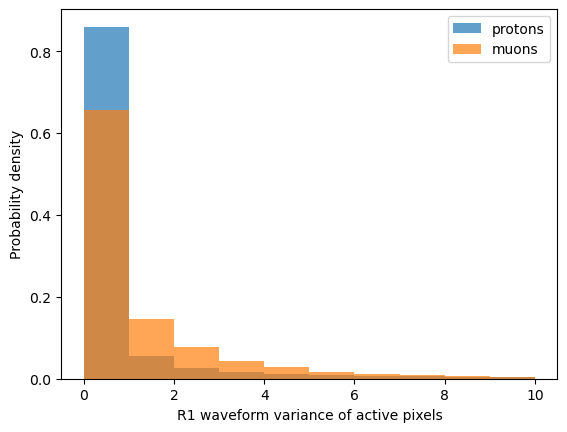

In [ ]:
plt.hist(variances_active_p, range = (0,10), density = True, alpha = 0.7, label = 'protons')
plt.hist(variances_active, range = (0,10), density = True, alpha = 0.7, label = 'muons')
plt.xlabel("R1 waveform variance of active pixels")
plt.ylabel("Probability density")
plt.legend()
#plt.ylim(0,2)

In [125]:
high_var_active_p = []
for act_var in variances_active_p:
    if act_var > 5:
        high_var_active_p.append(act_var)

high_var_active_m = []
for var in variances_active:
    if var > 5:
        high_var_active_m.append(var)

    
high_var_p = []
for var in variances_p:
    if var > 5:
        high_var_p.append(var)

high_var_m = []
for var in variances:
    if var > 5:
        high_var_m.append(var)

In [114]:
len(high_var_p)

8569

In [126]:
print("number of high var protons = ", len(high_var_active_p))
print("active protons = ", active_protons)
print("number of high var muons = ", len(high_var_active_m))
print("active muons = ", active_muons)
print("===============")
print("number of high var protons = ", len(high_var_active_p)/active_protons)
print("number of high var muons = ", len(high_var_active_m)/active_muons)
print("===============")
print("===============")
print("number of high var protons = ", len(high_var_p))
print("active protons = ", active_protons)
print("number of high var muons = ", len(high_var_m))
print("active muons = ", active_muons)
print("===============")
print("relative number of high var protons = ", len(high_var_p)/active_protons)
print("relative number of high var muons = ", len(high_var_m)/active_muons)

number of high var protons =  13203
active protons =  658
number of high var muons =  335
active muons =  38
number of high var protons =  20.065349544072948
number of high var muons =  8.81578947368421
number of high var protons =  13203
active protons =  658
number of high var muons =  335
active muons =  38
relative number of high var protons =  20.065349544072948
relative number of high var muons =  8.81578947368421


In [230]:
len(high_var_p)/len(variances_active_p)

0.07103763748512369

In [234]:
len(high_var_m)/len(variances_active)

0.012952448545067424

In [250]:
len(variances_active)

5636

In [251]:
len(muon_events)

38

## Variance Analysis

In [292]:
#var_hist_m = [np.mean(variances_m_dict[key]) for key in variances_m_dict]
#var_hist_p = [np.mean(variances_p_dict[key]) for key in variances_p_dict]

var_hist_m_short = [np.mean(variances_m_dict[key]) for key in variances_m_dict] # only for considered time span (10:14)
var_hist_p_short = [np.mean(variances_p_dict[key]) for key in variances_p_dict]


len(var_hist_p)

658

In [338]:
outliers = [var for var in var_hist_p_short if var > 0.4]
len(outliers)/len(var_hist_p_short)
#var_hist_m

0.0729483282674772

Text(0.5, 1.0, 'Distribution of mean for variance per pixel for timebins [10:14]')

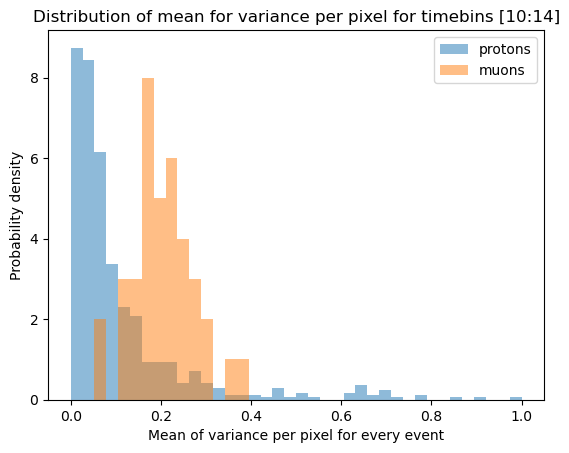

In [315]:

plt.hist(var_hist_p_short, alpha = 0.5, density = True, bins = 38, range =(0,1), label='protons')
plt.hist(var_hist_m_short, alpha = 0.5, density = True, bins = 38, range=(0,1), label='muons')
plt.legend()
plt.xlabel('Mean of variance per pixel for every event')
plt.ylabel('Probability density')
plt.title('Distribution of mean for variance per pixel for timebins [10:14]')

Text(0, 0.5, 'Probability density')

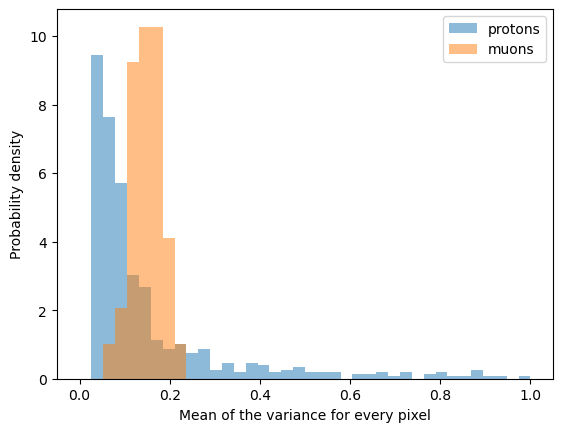

In [335]:
plt.hist(var_hist_p, alpha = 0.5, density = True, bins = 38, label='protons', range = (0,1))
plt.hist(var_hist_m, alpha = 0.5, density = True, bins = 38, label='muons', range=(0,1))
#plt.xlim(0,1)
#plt.ylim(0,0.0001)
plt.legend()
#plt.title('Distribution of mean for variance per pixel')
plt.xlabel("Mean of the variance for every pixel")
plt.ylabel("Probability density")

In [285]:
var_hist_p

[0.051802836,
 0.045076128,
 0.039883867,
 34.176506,
 0.41545576,
 2.8735023,
 0.11144103,
 0.066907376,
 0.259534,
 0.30781147,
 0.05252812,
 0.106191374,
 0.14344028,
 0.23687804,
 5.882899,
 0.12354736,
 0.07690293,
 0.10612482,
 0.22571059,
 0.1738114,
 0.2058025,
 0.04531872,
 0.047081154,
 0.057833426,
 0.11646564,
 0.04396067,
 0.32524976,
 0.14800884,
 0.0766979,
 0.5488607,
 0.8826309,
 0.11610702,
 0.4551999,
 0.13113369,
 0.71810335,
 0.28334543,
 0.08563792,
 0.5656152,
 90.93262,
 0.07379799,
 0.1093269,
 0.040538713,
 0.09185312,
 0.041104358,
 0.39031702,
 0.04898298,
 0.14652875,
 0.1323139,
 0.10580674,
 0.04031036,
 0.039206877,
 0.15056491,
 0.13787554,
 0.10508545,
 5.7796707,
 0.040396947,
 0.079419315,
 0.074523896,
 0.79333955,
 0.06501542,
 6.029025,
 0.04134797,
 2.6586337,
 0.04817086,
 8.451811,
 0.13780761,
 0.17918521,
 0.09696283,
 0.04292294,
 0.10331649,
 0.04992143,
 0.081572175,
 0.16952717,
 2.3050785,
 0.041332137,
 0.06430694,
 0.0929452,
 0.052657

## Time of max R1 waveform

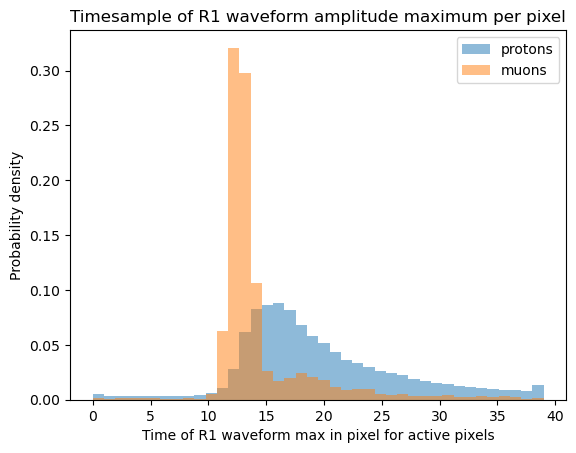

In [304]:
#plt.hist(argmaxes_p, density = True, bins = 38, range = (1,38), alpha = 0.5, label = 'protons')
#plt.hist(argmaxes, density = True, bins = 38, range = (1,38),alpha = 0.5, label = 'muons')

plt.hist(argmaxes_active_p, density = True, bins = 40, alpha = 0.5, label = 'protons')
plt.hist(argmaxes_active, density = True, bins = 40, alpha = 0.5, label = 'muons')

plt.xlabel("Time of R1 waveform max in pixel for active pixels")
plt.title("Timesample of R1 waveform amplitude maximum per pixel")
plt.ylabel("Probability density")
plt.legend()
#plt.ylim(0,1)

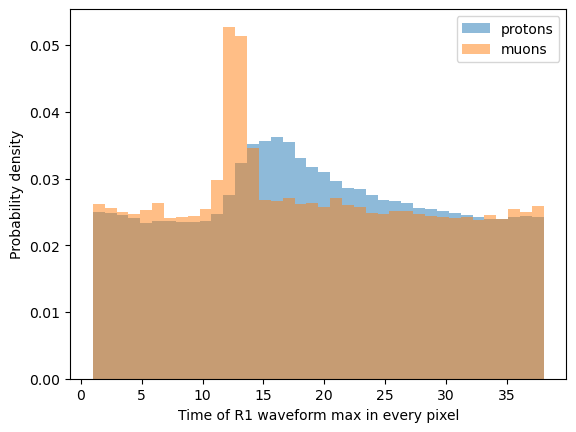

In [190]:
plt.hist(argmaxes_p, density = True, bins = 38, range = (1,38), alpha = 0.5, label = 'protons')
plt.hist(argmaxes, density = True, bins = 38, range = (1,38),alpha = 0.5, label = 'muons')
plt.xlabel("Time of R1 waveform max in every pixel")
plt.ylabel("Probability density")
plt.legend()
#plt.ylim(0,1)

## Max Value in every pixel analysis

In [322]:
outliers = [i for i in max_values_p if i > 10]
len(outliers)/len(max_values_p)

0.001649202434888046

(0.0, 0.1)

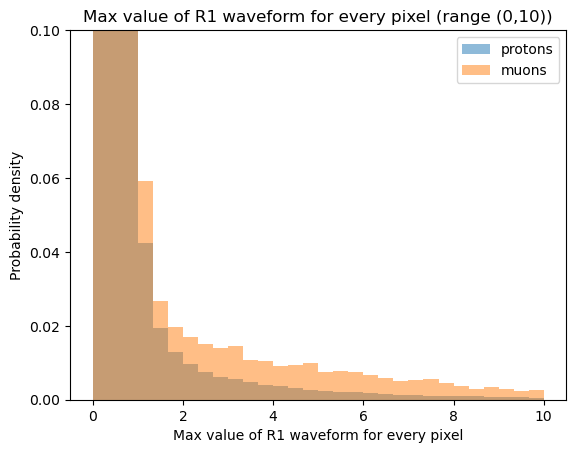

In [324]:
plt.hist(max_values_p,bins = 30, range = (0,10), density = True, label = 'protons', alpha = 0.5)
plt.hist(max_values, bins = 30, range = (0,10), density = True, label = 'muons', alpha = 0.5)
plt.legend()
plt.title("Max value of R1 waveform for every pixel (range (0,10))")
plt.ylabel("Probability density")
plt.xlabel("Max value of R1 waveform for every pixel")
plt.ylim(0,0.1)

Text(0.5, 0, 'Max value of R1 waveform for every pixel')

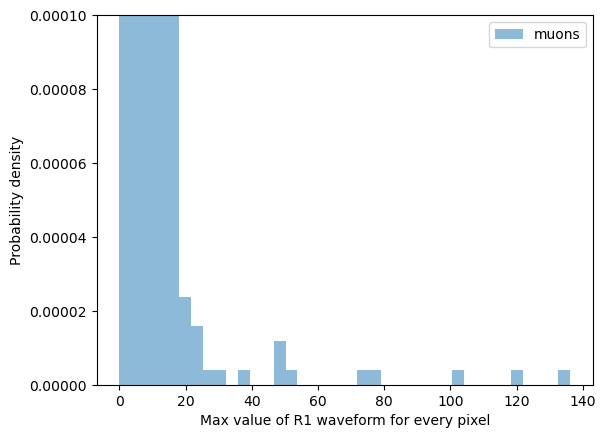

In [252]:
plt.hist(max_values, bins = 38, range = (0,max(max_values)), density = True, label = 'muons', alpha = 0.5)
plt.legend()
plt.ylim(0,0.0001)
plt.ylabel("Probability density")
plt.xlabel("Max value of R1 waveform for every pixel")

## Max value times argmax analysis

In [321]:
outliers = [i for i in max_times_argmax_p if i > 10]
len(outliers)/len(max_times_argmax_p)

0.009525721167632046

Text(0.5, 0, 'max(pixel) times argmax(pixel)')

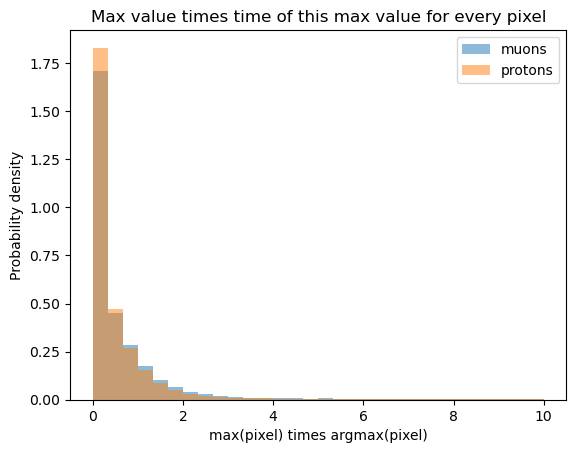

In [308]:
plt.hist(max_times_argmax, label = 'muons', bins = 30, range = (0,10), alpha = 0.5, density = True)
plt.hist(max_times_argmax_p, label = 'protons', bins = 30, range = (0,10), alpha = 0.5, density = True)
plt.legend()
plt.title("Max value times time of this max value for every pixel")
plt.ylabel("Probability density")
plt.xlabel("max(pixel) times argmax(pixel)")


In [243]:
min(max_times_argmax)

-2.9667069911956787